# LH009 🟢 PySpark Drills 3: GroupBy

>  **Note**: this tutorial is provided for educational purposes, for members of the [Fabric Dojo community](https://skool.com). All content contained within is protected by Copyright © law. Do not copy or re-distribute. 

Welcome to the 3rd of five drill-style tutorials. The goal of this mini-series is to expose you to a wide variety of commonly used PySpark functions. 

In this 3rd tutorial in the mini-series, we will look at GroupBy and Aggregations in Spark dataframes. 

You'll be given an empty code cell to write the code for each drill. Try to complete each drill without the use of the walkthrough video, but it's there if you need it! 

#### Prerequisites
1. You should already have a Lakehouse in your Fabric Workspace (from the previous exercise) - LH007_PropertyLH 
2. Load this notebook into your Fabric Workspace. Connect this notebook to the LH007_PropertyLH Lakehouse. 
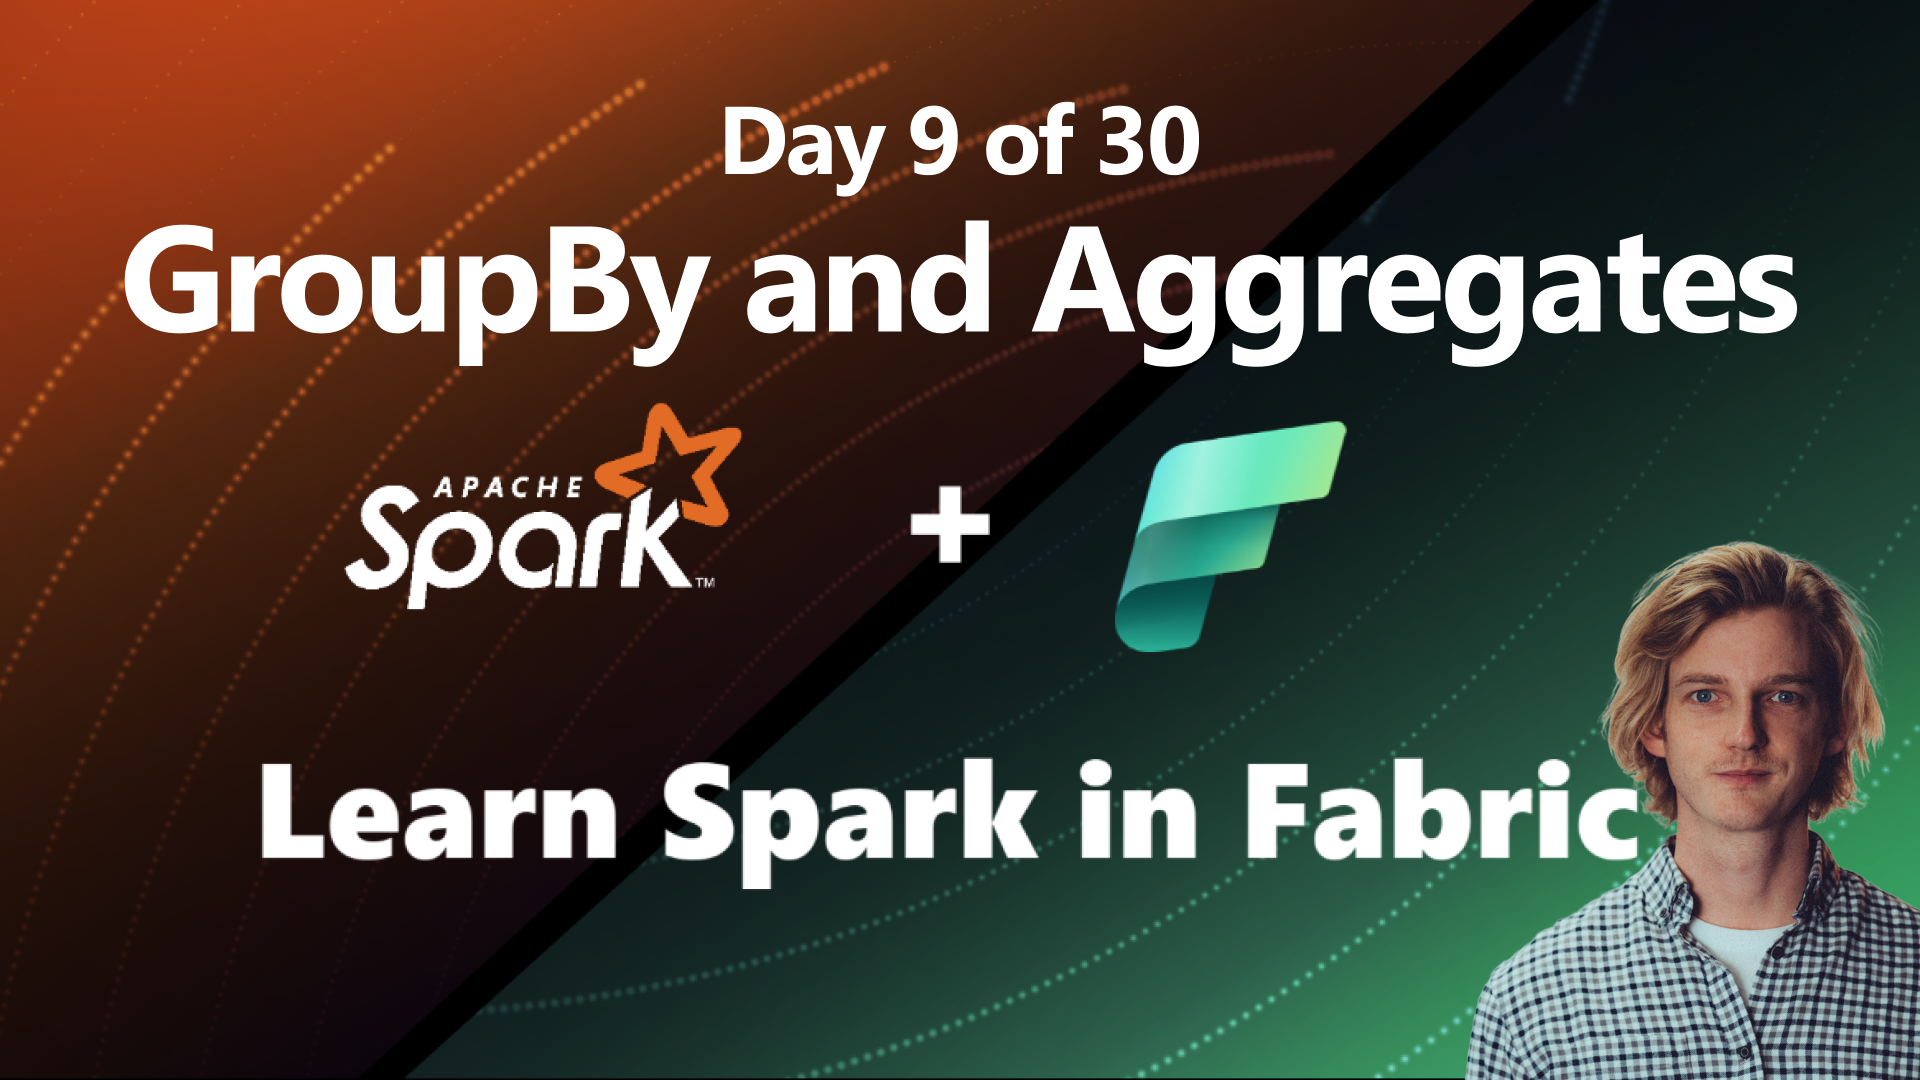

#### Data loading from CSV

**Run the script below to load the `property-sales.csv` file from `Files/` into a Spark dataframe.** 

It also cleans some of the column names - take note of the chaining inside the ( ) syntax. 


In [ ]:
df = (
    spark.read.format("csv")
        .option("header","true")
        .option("inferSchema", True)
        .load("Files/property-sales.csv")
        .withColumnsRenamed({'Address ': 'Address', 'City ': 'City', 'SalePrice ($)': 'SalePriceUSD'})
)

display(df)

#### Drill 3.1: Simple aggregates
In general, we can call the [df.groupBy()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.groupBy.html) method on any Spark dataframe. We can also (optionally, but more than likely) add on an aggregate function to the end of df.groupby(), like df.groupBy().count(), for example. 

Using [df.groupBy().count()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.count.html), **transform your dataframe to show the row count, based on a grouping by City:** 

In [ ]:
#Row count, by City
df.groupBy('City').count().show()


There are many out-the-box aggregate functions that we can run on a dataframe. 

This time, using [groupedData.max()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.GroupedData.max.html), **group by the dataframe by the Agent column, and calculate the max() SalePriceUSD, for each agent:**

_Note: add an [alias()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.alias.html) to the end of your chain, to rename the max aggregate column to MaxSalePrice._ 
 


In [ ]:
# maximum sales price for each agent
( 
  df.groupBy('Agent')
  .max('SalePriceUSD')
  .show()
) 


#### Drill 3.2: Aggregate renaming
You'll notice the column name of your aggregate column is not the prettiest. 

To rename this column, you can use any of the methods we have looked at to this point. But we are going to at a different way to structure an aggregate function, that makes it easier to provide an alias for the column name, after the aggregation. This is what that looks like: 

In [ ]:
# import the max function
from pyspark.sql.functions import max

# group by the Agent, using agg(max().alias())
(
    df.groupBy("Agent") 
        .agg(max('SalePriceUSD').alias('MaxSalePrice'))
        .show()
)

#### Drill 3.3 Returning multiple aggregates

The agg() function can also be used to perform multiple aggregate functions on the same grouping. 

Using [df.groupBy().agg(A, B)](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.GroupedData.agg.html) style syntax, **calculate the maximum and the average SalePriceUSD for each City** 

_Note: for bonus points, round the Maximum values and Average values to 0 decimal places, and renames the Aggregate columns to something sensible._



In [ ]:
# import avg, max, and round methods
from pyspark.sql.functions import avg,max,round

# groupby City, and max and avg aggregations of SalePriceUSD
(
    df.groupBy("City")
        .agg(
            round(max("SalePriceUSD"),0).alias("MaxSalePrice"), 
            round(avg("SalePriceUSD"),0).alias("AvgSalePrice")
        )
        .show() 
)


#### Drill 3.4: Filtering the Aggregate (like T-SQL HAVING)

Because of the way Spark chaining works, we can chain a .where() or a filter() onto the end of your groupBy().agg() function to filter the output of your aggregate. 

Copy the code you created for the last drill (Drill 3.3), and this time **add a filter() or where() onto the end to return only the rows that have an average sales price of more than 500k:**

In [ ]:
#import avg,max,round,col
from pyspark.sql.functions import avg,max,round,col

# groupby City, and max and avg aggregations of SalePriceUSD, where AvgSalePrice > 500k
(
    df.groupBy("City")
        .agg(
            round(max("SalePriceUSD"),0).alias("MaxSalePrice"), 
            round(avg("SalePriceUSD"),0).alias("AvgSalePrice")
        )
        .where(col("AvgSalePrice") >= 500000)
        .show() 
)


#### Drill 3.5: Grouping by multiple columns

Lastly, it's important to note that, just like most other programming languages, you can also Group By multiple columns. 

Using [df.groupBy([])](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.groupBy.html), **group the dataframe by City AND Agent, and calculate the average SalePriceUSD:** 



In [ ]:
# group by City and Agent, calculate hte average SalePriceUSD
(
    df.groupBy(['City', 'Agent'])
        .avg('SalePriceUSD')
        .show()
)

#### END